In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('C:/source/exercise/data/student.csv', encoding='cp949') # cp949 마이크로소프트
df.describe(include='all')  # 요약 개수 평균 최소 최대 4분위 . 기본적으로 문자 컬럼은 제외함. 
df.info()                   # 각 컬럼에 데이터 타입
df.head(3)  
df.tail(2)
df.columns
df.get('키')                #<class 'pandas.core.series.Series'>
df.get('키').values         #<class 'numpy.ndarray'>
df.loc[[2,5]][['몸무게','나이']] # 행 먼저 접근
# row 에 index 말고 아이디 ident 넣기
df.set_index(df.get('id').values, inplace=True) # inplace=True 반환하지 않고 자기자신에게 적용하기
df[(df['키'] >= 170) & (df['성별'] == '남')][['몸무게','나이']] # 조건을 서로 묶을때 조건마다 괄호로 감싸야됨
df.drop('키', axis=1) # df.drop(1)
df = pd.DataFrame(data={'A반':[95,92,98,100], 'B반':[91,93,97,99]}) # 컬럼 기준 생성 형태
df = pd.DataFrame(data=[[95,91],[92,93],[98,97],[100,99]], columns=['A반','B반']) # 로우 기준 생성 형태
df = df.join(pd.DataFrame(data=[[87],[89],[78],[86]], columns=['C반'])) # 컬럼 추가
df_row = pd.DataFrame(data={'A반':[84], 'B반':[76], 'C반':[65]})
df = pd.concat([df,df_row], ignore_index=True) # 로우 추가
# pd.merge(<A테이블>, <B테이블>, on=<기준컬럼>, how='outer') # outer 합집합
data = { 'Date': ['2023-01-01', '2023-01-01', '2023-01-02', '2023-01-02', '2023-01-03'], 'Category': ['A', 'B', 'A', 'B', 'A'], 'Value': [10, 20, 15, 25, 10] }
pd.DataFrame(data).pivot(index='Date', columns='Category', values='Value') # 구조 변환
import openpyxl
df = pd.read_excel(r'C:\수업자료PC\통계기초\source\준비파일\10장_상관계수.xlsx'.replace('\\','/'), 0)
df = pd.DataFrame(df)
#df.loc[0, 0] = 0 # 요소 수정 
df1 = df.dropna(axis=1, thresh=500) # nan 있는 행 또는 열 삭제 # threshold 한계점 # subset='age' 컬럼지정
# df['age'].fillna(age_mean) # 결측치 평균으로 채움
# df.to_csv('path/name.csv') # 데이터 csv 파일로 저장
# df['embark_town'].mode()[0] # 최빈값 # 최대 빈도를 가진 값
# df['horsepower'].astype(np.int64) # 시리즈 타입 변경

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# np.random.randint(0, 10)
np.random.seed(10) ## 난수표 결과가 동일하다
# np.random.randint(0, 10)
np.random.normal(0, 1, size=(10)) # 평균 , 표준편차, 배열형태

0.05980830814078976

(array([263, 103,  32], dtype=int64), array([ 46.        , 107.33333333, 168.66666667, 230.        ]))


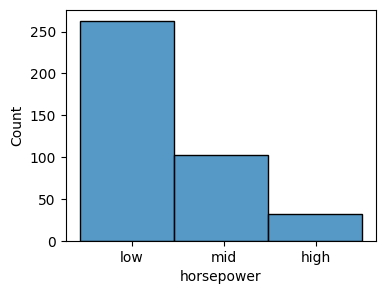

In [4]:
df = pd.read_csv(r'../data/auto-mpg.csv')
df.describe() # 398 * 9
df.head(2)
# np.arange(50,100,5)
df['horsepower'].value_counts()
df['horsepower'].describe(include='all')
df['horsepower'].isna().sum()
df['horsepower'].unique()
# df['horsepower'] = df['horsepower'].astype('float')
df[df['horsepower'] == '?'] # 숫자 타입에 쓰레기가 들어있다
df['horsepower'] = df['horsepower'].replace('?', np.nan) # 쓰레기를 np.nan 으로 변경한다
df['horsepower'] = df['horsepower'].astype('float') # 숫자 타입으로 변경한다

hp_mean = round(df['horsepower'].mean(),1) # 숫자타입이므로 평균을 구할 수 있다
hp_mean
df['horsepower'] = df['horsepower'].fillna(hp_mean) # 결측치에 평균으로 대체한다
# # help(pd.DataFrame().mean)
# df1['horsepower']
df['horsepower'].isna().sum() # 결측치가 아직 있는지 재 검사 한다. 
df['horsepower'].describe()
plt.figure(figsize=(4,3))  #그래프 창 크기 설정
# sns.histplot(df1['horsepower'], bins= np.arange(40,240,100))
# sns.histplot(df1['horsepower'], binrange=(40, 240), bins=3)
print(np.histogram(df['horsepower'],  bins=3)) # 구역별로 갯수를 세준다. 튜플 리스트를 반환한다.
sns.histplot(df['horsepower'],  bins=3)
plt.xticks([80, 140, 200], ['low', 'mid', 'high'])
plt.show()
# help(sns.histplot)
# help(plt.xticks)


In [7]:
bin_count, bin_arr = np.histogram(df['horsepower'],  bins=3)
df['hp_bin'] = pd.cut(x = df['horsepower'], bins=bin_arr, labels=['low', 'mid', 'high'], include_lowest=True)
pd.get_dummies(df['hp_bin']) # 카테고리 별로 보여준다.
# df['hp_bin']

0      mid
1      mid
2      mid
3      mid
4      mid
      ... 
393    low
394    low
395    low
396    low
397    low
Name: hp_bin, Length: 398, dtype: category
Categories (3, object): ['low' < 'mid' < 'high']

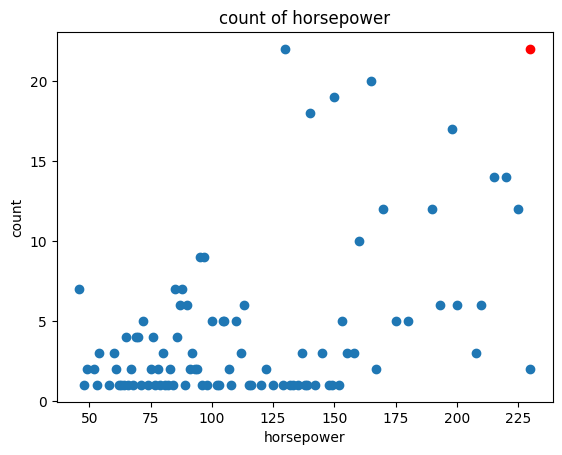

count    398.000000
mean     104.469849
std       38.199188
min       46.000000
25%       76.000000
50%       95.000000
75%      125.000000
max      230.000000
Name: horsepower, dtype: float64

In [14]:
df = pd.read_csv(r'../data/auto-mpg.csv')
df.describe() # 398 * 9
df.head(2)
# df.isna().sum() # 결측치 없음
# 1mpg = 2.35215 l/km
lpkm = df['mpg'] * 2.35215
df['lpkm'] = lpkm.round(1)
df['horsepower']  = df['horsepower'].replace('?',None)
df['horsepower'] = df['horsepower'].astype('float')

df[None == df['horsepower']]
df['horsepower'].unique()
df['origin'] = df['origin'].replace([1,2,3], ['USA','EU','JP'])
df['origin'].dtype
df['horsepower'].isna().sum()
df['origin'] = df['origin'].astype('category')
df['origin'].dtype
df[None == df['horsepower']] # 결측치를 비교할 수없대 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 그냥 fillna 로 바꿔버려
df.isna().sum()
df[df['horsepower'] == np.NaN]
hp_mean = round(df['horsepower'].mean(), 1)
df['horsepower'] = df['horsepower'].fillna(hp_mean)
df['horsepower'].mean()
df['horsepower'].describe()

plt.scatter(df['horsepower'].unique(), df['horsepower'].value_counts())
# plt.grid()
plt.xlabel('horsepower')
plt.ylabel('count')
plt.title('count of horsepower')
# 최대값에 점 찍고 텍스트 추가
# plt.plot(df['horsepower'].unique().max(), df['horsepower'].value_counts().max(), 'ro')  # 빨간색 점
# plt.text(max_index, max_value + 0.5, f'Max: {max_value}', ha='center')

plt.show()
df['horsepower'].describe()




In [61]:
# 교육용은 라이브러리안의 데이터를 이용한다.
sns.get_dataset_names()
df = sns.load_dataset('titanic')
df.head()
df.isna().sum()
df['deck'].value_counts(dropna=False) # 203  NaN 688 tot 891
df['deck']
df1 = df.dropna(axis=1, thresh=500) # threshold 한계점
df1.isna().sum()
df2 = df1.dropna(axis=0, subset='age')
df2.isna().sum()
# 결측치 대체 imputation  
age_mean = np.round(df['age'].mean(), 1)
df['age'].fillna(age_mean).mean()
# ?df?  # 인스턴스 보는 문법인가?
df2['embark_town'].value_counts(dropna=False)
# df2[df2['embark_town'] == np.nan]
et = df['embark_town'].mode() # 최빈값
print(et[0])
# df['embark_town'].fillna(df['embark_town'].mode()).isna().sum()
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])
df.isna().sum()
sns.get_dataset_names()


Southampton


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [42]:
df = pd.read_csv(r'../data/titanic/tested.csv')
# df.info()
df.describe()
df.head(2)
# emb_copy = df['Embarked'].copy().to_list()
# emb_copy[0] = np.nan
# emb_copy
# df = df.drop('Embarked', axis=1)
# df = df.join(emb_copy)
# df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [52]:
df.loc[0, 'Embarked'] = 'Q'
df.head()
df.isna().sum()

# df.info() # 바로 형변환이 되네

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

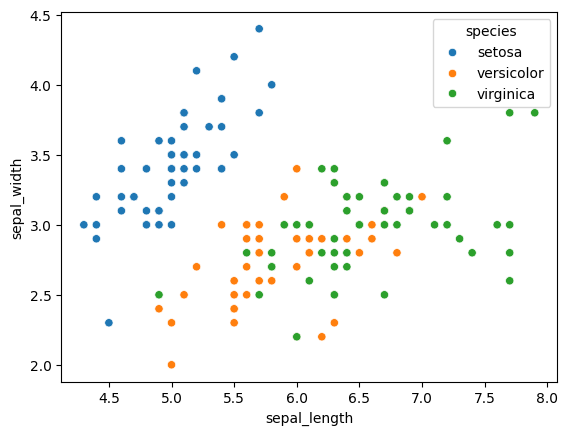

In [6]:
# Seaborn 내장 데이터셋인 'iris' 로드
iris = sns.load_dataset('iris')

# seaborn을 사용하여 산점도 그리기
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris)

# 그래프 표시
plt.show()


In [113]:
# "C:\수업자료PC\통계기초\source\준비파일\ch12_scores_reg.csv"
import matplotlib.pyplot as mpp
df = pd.read_csv(r'C:\수업자료PC\통계기초\source\준비파일\ch12_scores_reg_copy.csv'.replace('\\','/'))
df = pd.DataFrame(df)
df.head(1) # 1 버스 2사이클 3걷기



,quiz,final_test,sleep_time,school_method
0,4.2,67,7.2,1


In [118]:
import numpy as np
# pip install statsmodels
import statsmodels.api as sm

# 데이터 생성
np.random.seed(0)
X = df['final_test']
y = df['quiz']

# X에 상수 추가 (절편을 포함하기 위해)
X = sm.add_constant(X)

# 모델 생성 및 학습
model = sm.OLS(y, X).fit() # Ordinary Least Squares 정규방정식

# 결과 요약 출력
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   quiz   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Thu, 08 Aug 2024   Prob (F-statistic):           8.59e-06
Time:                        15:21:05   Log-Likelihood:                -34.814
No. Observations:                  20   AIC:                             73.63
Df Residuals:                      18   BIC:                             75.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2531      0.868     -1.443      0.1

피어슨 상관계수: 0.8224024358855583


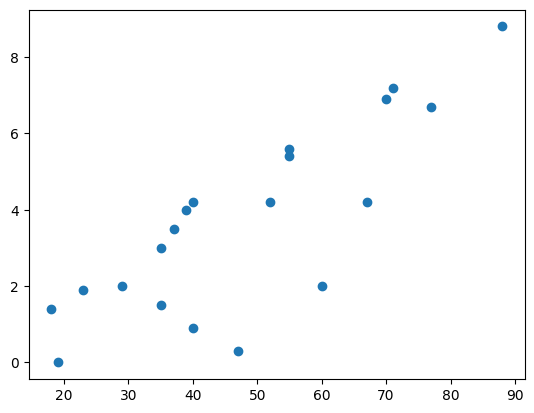

In [117]:
correlation = df['final_test'].corr(df['quiz'])
print("피어슨 상관계수:", correlation) 
mpp.scatter(df['final_test'], df['quiz'])
mpp.show()

In [115]:
correlation = df['final_test'].corr(df['sleep_time'])
print("피어슨 상관계수:", correlation) 

피어슨 상관계수: 0.3275051008612842


In [116]:
correlation = df['final_test'].corr(df['school_method'])
print("피어슨 상관계수:", correlation) 

피어슨 상관계수: -0.2090391677712017


46.89777777777778
0.8287261754245708


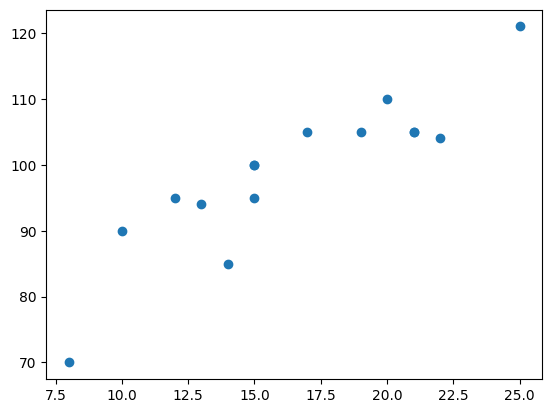

In [103]:
#"C:\수업자료PC\통계기초\source\준비파일\10장_상관계수.xlsx"
import openpyxl
import matplotlib.pyplot as mpp
df = pd.read_excel(r'C:\수업자료PC\통계기초\source\준비파일\10장_상관계수.xlsx'.replace('\\','/'), 0)
df = pd.DataFrame(df)
df = df.set_index('연도')
df.head(1)
mt = df['광고비'] - df['광고비'].mean() # 광고비편차
sl = df['매출액'] - df['매출액'].mean() # 매출액편차
cov = mt * sl 
print(cov.sum() / 15) # 공분산 : 편차의 곱 의 합 / n - 1
print((cov.sum() / 15) / (df['광고비'].std() * df['매출액'].std()))
mpp.scatter(df['광고비'], df['매출액'])
mpp.show()


In [91]:
correlation = df['광고비'].corr(df['매출액'])
print("피어슨 상관계수:", correlation) 
# 상관계수는 = 공분산 / a표준편차 * b표준편차
# = (a편차 * a편차 / n) / (a표준편차 * b표준편차)

피어슨 상관계수: 0.8879209022406115


In [73]:
data = {'학생':['A','B','C','D','E'],
        '국':[80,90,95,70,75],
        '영':[90,95,70,85,90],
        '수':[85,95,75,80,85]}
df = pd.DataFrame(data)
df


,학생,국,영,수
0,A,80,90,85
1,B,90,95,95
2,C,95,70,75
3,D,70,85,80
4,E,75,90,85


In [65]:
df.iloc[0][1:].mean()
df.get('국').mean()
df[['국','영','수']].mean()
df.get('국').sort_values()
# '학생' 열을 인덱스로 설정
df = df.set_index('학생')
# pivot 축
# 

In [77]:
df.describe()
# df.pivot
df.pivot(index='학생', columns=['국','영','수'])

학생
A
B
C
D
E


In [70]:
df.transpose().describe()

학생,A,B,C,D,E
count,3.0,3.000000,3.000000,3.000000,3.000000
mean,85.0,93.333333,80.000000,78.333333,83.333333
std,5.0,2.886751,13.228757,7.637626,7.637626
min,80.0,90.000000,70.000000,70.000000,75.000000
25%,82.5,92.500000,72.500000,75.000000,80.000000
50%,85.0,95.000000,75.000000,80.000000,85.000000
75%,87.5,95.000000,85.000000,82.500000,87.500000
max,90.0,95.000000,95.000000,85.000000,90.000000


In [66]:
# 행 단위로 평균 계산
df.mean(axis=1).round(1)


학생
A    85.0
B    93.3
C    80.0
D    78.3
E    83.3
dtype: float64

In [67]:
df.mean(axis=0).round(1)

국    82.0
영    86.0
수    84.0
dtype: float64

In [63]:
df = df.transpose()
# df.describe()
# df = df.set_index('학생')
df.mean(axis=1).round(1)

국    82.0
영    86.0
수    84.0
dtype: float64

In [80]:
data = { 'Date': ['2023-01-01', '2023-01-01', '2023-01-02', '2023-01-02', '2023-01-03'], 'Category': ['A', 'B', 'A', 'B', 'A'], 'Value': [10, 20, 15, 25, 10] }
pd.DataFrame(data).pivot(index='Date', columns='Category', values='Value')

Category,A,B
Date,,
2023-01-01,10.0,20.0
2023-01-02,15.0,25.0
2023-01-03,10.0,NaN


In [ ]:
import openpyxl
df = pd.read_excel('C:\source\exercise\data\typhoon_asia.xlsx'.replace('\\','/'), [0], )
df

In [7]:
data1 = {'Name': ['Harry Potter','David Baker','John Smith','Juan Martinez','Jane Connor'],
         'Gender':[ 'Male','Male','Male','Male','Female'],
         'Age':[ 23,31,22,36,30,]}

data2 = { 'Name':['John Smith','Alex Du Bois','Joanne Rowling','Jane Connor'],
          'Position':['Intern','Team Lead','Manager','Manager'],
           'Wage':[25000,75000,90000,70000]}
df1 = pd.DataFrame(data=data1)
df2 = pd.DataFrame(data=data2)
df1
df2
# 키는 Name 
pd.merge(df1, df2, on='Name') # 기본 교집합 inner
pd.merge(df1, df2, on='Name', how='left') # a의 차집합
pd.merge(df1, df2, on='Name', how='right') # b의 차집합
pd.merge(df1, df2, on='Name', how='outer') # 합집합 (NaN 결측치)
# np.NaN

nan

In [26]:
df = pd.DataFrame(data={'A반':[95,92,98,100], 'B반':[91,93,97,99]})
df = pd.DataFrame(data=[[95,91],[92,93],[98,97],[100,99]], columns=['A반','B반'])
df.describe()
# df_add = pd.DataFrame(data=[[87],[89],[78],[86]], columns=['C반'])
df = df.join(pd.DataFrame(data=[[87],[89],[78],[86]], columns=['C반']))
df_row = pd.DataFrame(data={'A반':[84], 'B반':[76], 'C반':[65]})
# df.add(df_add) + 연산임 
# df.insert(4,column=)
# df.combine(df_add,None)

df = pd.concat([df,df_row], ignore_index=True)
# pd.concat([df,df_row])
df

,A반,B반,C반
0,95,91,87
1,92,93,89
2,98,97,78
3,100,99,86
4,84,76,65


In [39]:
data_list = [[1,'홍일동', 166, 59, 19, '남'],
            [2,'홍이동', 168, 600, 19, '여'],
            [3,'홍삼동', 170, 33, 19, '남'],
            [4,'홍사동', 172, 32, 19, '여'],
            [5,'홍오동', 174, 30, 19, '남']]
df = pd.DataFrame(data=data_list, columns=['id', '학생명', '키', '몸무게', '나이', '성별']) 
# 행으로 된 데이터를 넣는 방법
df



,id,학생명,키,몸무게,나이,성별
0,1,홍일동,166,59,19,남
1,2,홍이동,168,600,19,여
2,3,홍삼동,170,33,19,남
3,4,홍사동,172,32,19,여
4,5,홍오동,174,30,19,남


In [138]:
path = r'C:\source\exercise\data\typhoon.csv'
path = path.replace('\\', '/')
print(path)
typhoon_df = pd.read_csv(path, encoding='cp949')
print(typhoon_df.describe())
print(typhoon_df.info())
print(typhoon_df.head())
print(typhoon_df)


C:/source/exercise/data/typhoon.csv
                 년
count    24.000000
mean   2012.500000
std       7.071068
min    2001.000000
25%    2006.750000
50%    2012.500000
75%    2018.250000
max    2024.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년       24 non-null     int64 
 1   1월      24 non-null     object
 2   2월      24 non-null     object
 3   3월      24 non-null     object
 4   4월      24 non-null     object
 5   5월      24 non-null     object
 6   6월      24 non-null     object
 7   7월      24 non-null     object
 8   8월      24 non-null     object
 9   9월      24 non-null     object
 10  10월     24 non-null     object
 11  11월     24 non-null     object
 12  12월     24 non-null     object
 13  연합계     24 non-null     object
dtypes: int64(1), object(13)
memory usage: 2.8+ KB
None
      년    1월    2월    3월    4월    5월    6월    7월    8월   

In [160]:
typhoon_df
typhoon_kor_df = typhoon_df.copy()
typhoon_asia_df = typhoon_df.copy()
split = lambda x : int(str(x).split('(')[0])
split_kor = lambda x : int(str(x).split('(')[1][0])
# typhoon_kor_df['1월'] = [split(i) for i in typhoon_df['1월'].values ]
typhoon_kor_df['1월'] = [split_kor(i) for i in typhoon_df['1월'].values ]
for i in typhoon_df.columns:
    # print(i)
    if i == '년':
        continue
    typhoon_asia_df[i] = [split(i) for i in typhoon_df[i].values ]
    typhoon_kor_df[i] = [split_kor(i) for i in typhoon_df[i].values ]
# 태풍이 증가하고 있는가?
# typhoon_df
#typhoon_kor_df.to_csv('C:/source/exercise/data/typhoon_kor.csv', index=False)
#typhoon_asia_df.to_csv('C:/source/exercise/data/typhoon_asia.csv', index=False)


In [150]:
typhoon_kor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   년       24 non-null     int64
 1   1월      24 non-null     int64
 2   2월      24 non-null     int64
 3   3월      24 non-null     int64
 4   4월      24 non-null     int64
 5   5월      24 non-null     int64
 6   6월      24 non-null     int64
 7   7월      24 non-null     int64
 8   8월      24 non-null     int64
 9   9월      24 non-null     int64
 10  10월     24 non-null     int64
 11  11월     24 non-null     int64
 12  12월     24 non-null     int64
 13  연합계     24 non-null     int64
dtypes: int64(14)
memory usage: 2.8 KB


In [122]:
# data.go.kr
df.drop('키', axis=1) # df.drop(1)

,id,학생명,키,몸무게,나이,성별
2,2,홍이동,168,600,19,여
3,3,홍삼동,170,33,19,남
4,4,홍사동,172,32,19,여
5,5,홍오동,174,30,19,남


In [118]:
pd.Series([1,2,3,4,5])
pd.Series(np.arange(10))
sr = pd.Series({'age': 1})
sr2 = pd.Series({'mu': 2})
pd.concat([sr, sr2])
# sr.append(pd.Series(np.arange(10)))
# pd.concat([sr, pd.Series(np.arange(10))])


age    1
mu     2
dtype: int64

In [83]:
df.loc[[2,5]][['몸무게','나이']] # 행 먼저 접근
df['키'] >= 170
df['성별'] == '남'
df[(df['키'] >= 170) & (df['성별'] == '남')][['몸무게','나이']]

,몸무게,나이
3,33,19
5,30,19


In [90]:
[i for i in [1,2,3,4,5] if i > 3]
# [1,2,3,4,5] > 3  # 안됨 ㅋㅋㅋㅋㅋㅋ

[4, 5]

In [67]:
df.get('몸무게').get(2) # 열 먼저 접근
df.loc[2]['몸무게'] # 행 먼저 접근
df.iloc[1,3] # 행열 개념으로 접근 가능
df.iloc[1,3:5] # 행열 개념으로 접근 가능
df.loc[[2,5]][['몸무게','나이']] # 행 먼저 접근

,몸무게,나이
2,600,19
5,30,19


In [57]:
# row 에 index 말고 아이디 ident 넣기
df.set_index(df.get('id').values, inplace=True) # inplace=True 반환하지 않고 자기자신에게 적용하기
df.loc[1]
df.loc[[2,5]] # 행보기

,id,학생명,키,몸무게,나이,성별
2,2,홍이동,168,600,19,여
5,5,홍오동,174,30,19,남


In [46]:
df.iloc[0]
# type(df.iloc[0]) pandas.core.series.Series

id       1
학생명    홍일동
키      166
몸무게     59
나이      19
성별       남
Name: 0, dtype: object

C:\Users\hungh\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47800 (\N{HANGUL SYLLABLE MOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hungh\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hungh\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44172 (\N{HANGUL SYLLABLE GE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hungh\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hungh\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49345 (

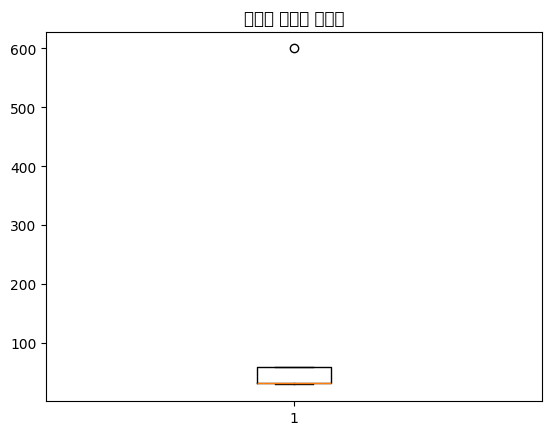

In [43]:
import matplotlib.pyplot as plt
plt.boxplot(df.get('몸무게').values)
plt.title("몸무게 이상치 시각화")
plt.show()

In [37]:
student_dic = {'student' : ['kim', 'jung', 'cho', 'oh', 'an']}
df = pd.DataFrame(student_dic)
id_dic = {'id' : [1,2,3,4,5]}
df.insert(0, 'id', id_dic.get('id'))
df


,id,student
0,1,kim
1,2,jung
2,3,cho
3,4,oh
4,5,an


In [30]:
help(pd.DataFrame)

Help on class DataFrame in module pandas.core.frame:

class DataFrame(pandas.core.generic.NDFrame, pandas.core.arraylike.OpsMixin)
 |  DataFrame(data=None, index: 'Axes | None' = None, columns: 'Axes | None' = None, dtype: 'Dtype | None' = None, copy: 'bool | None' = None) -> 'None'
 |
 |  Two-dimensional, size-mutable, potentially heterogeneous tabular data.
 |
 |  Data structure also contains labeled axes (rows and columns).
 |  Arithmetic operations align on both row and column labels. Can be
 |  thought of as a dict-like container for Series objects. The primary
 |  pandas data structure.
 |
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, dataclass or list-like objects. If
 |      data is a dict, column order follows insertion-order. If a dict contains Series
 |      which have an index defined, it is aligned by its index. This alignment also
 |      occurs if data is a Se

In [29]:
print(df.get('키').values, type(df.get('키').values)) #<class 'numpy.ndarray'>

[166 168 170 172 174] <class 'numpy.ndarray'>


In [26]:
print(df.get('키'), type(df.get('키'))) #<class 'pandas.core.series.Series'>

0    166
1    168
2    170
3    172
4    174
Name: 키, dtype: int64 <class 'pandas.core.series.Series'>


In [24]:
df.columns

Index(['ID', '학생명', '키', '몸무게', '나이', '성별'], dtype='object')

In [22]:
df.tail(2)

,ID,학생명,키,몸무게,나이,성별
3,4,홍사동,172,32,19,여
4,5,홍오동,174,30,19,남


In [21]:
df.head(3)

,ID,학생명,키,몸무게,나이,성별
0,1,홍일동,166,59,19,남
1,2,홍이동,168,600,19,여
2,3,홍삼동,170,33,19,남


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      5 non-null      int64 
 1   학생명     5 non-null      object
 2   키       5 non-null      int64 
 3   몸무게     5 non-null      int64 
 4   나이      5 non-null      int64 
 5   성별      5 non-null      object
dtypes: int64(4), object(2)
memory usage: 372.0+ bytes


In [19]:
df.describe()

,ID,키,몸무게,나이
count,5.000000,5.000000,5.000000,5.0
mean,3.000000,170.000000,150.800000,19.0
std,1.581139,3.162278,251.391527,0.0
min,1.000000,166.000000,30.000000,19.0
25%,2.000000,168.000000,32.000000,19.0
50%,3.000000,170.000000,33.000000,19.0
75%,4.000000,172.000000,59.000000,19.0
max,5.000000,174.000000,600.000000,19.0


In [18]:
import pandas as pd
import numpy as np
# csv 파일 불러오기
df = pd.read_csv('C:/source/exercise/data/student.csv', encoding='cp949') # cp949 마이크로소프트
print(df)
print(type(df)) #<class 'pandas.core.frame.DataFrame'>
df.info() #
print(df.학생명)
print(df['학생명'])
print(type(df['학생명']))

   ID  학생명    키  몸무게  나이 성별
0   1  홍일동  166   59  19  남
1   2  홍이동  168  600  19  여
2   3  홍삼동  170   33  19  남
3   4  홍사동  172   32  19  여
4   5  홍오동  174   30  19  남
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      5 non-null      int64 
 1   학생명     5 non-null      object
 2   키       5 non-null      int64 
 3   몸무게     5 non-null      int64 
 4   나이      5 non-null      int64 
 5   성별      5 non-null      object
dtypes: int64(4), object(2)
memory usage: 372.0+ bytes
0    홍일동
1    홍이동
2    홍삼동
3    홍사동
4    홍오동
Name: 학생명, dtype: object
0    홍일동
1    홍이동
2    홍삼동
3    홍사동
4    홍오동
Name: 학생명, dtype: object
<class 'pandas.core.series.Series'>


In [15]:
import pandas as pd
import numpy as np
import seaborn as sns

<AxesSubplot:ylabel='Count'>

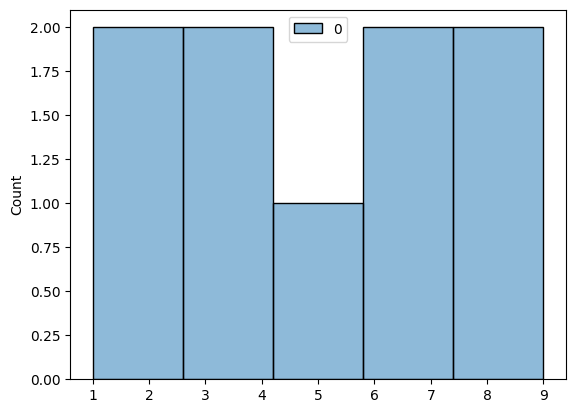

In [16]:
arr = np.arange(1,10)
arr2 = np.arange(1,10)
df = pd.DataFrame(arr,arr2)
df
sns.histplot(df)
